# Exploratory Data Analysis of Titanic Data Set

Importing Numpy, Pandas, Matplotlib, Seaborn libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Reading Data set 

In [21]:
data = pd.read_csv('Titanic_dataset.csv')

In [22]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Description of Data

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### We will begin Data exploratory Analysis, first we need to get the structured Data from our raw Dataset. 
Begin with finding the NULL / NaN values, if any try to establish some relation to fill these values.

In [24]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We observes that we have missing values in 3 columns i.e. Age, Cabin and Embarked. Again we can visualize the missing values with Heatmap using Seaborn Library.

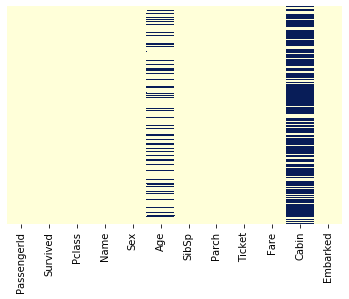

In [25]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

It is conclusive that majority of Cabin values and some Age values is missing.

#### Percenatge of missing Data Values :

In [26]:
Per_missing_data_Age = data['Age'].isnull().sum()/len(data.index)*100
Per_missing_data_Cabin = data['Cabin'].isnull().sum()/len(data.index)*100

In [27]:
Per_missing_data_Age

19.865319865319865

In [28]:
Per_missing_data_Cabin

77.10437710437711

We can drop the Cabin column or we can just fill it with 0 or 1 based on if it has value or null respectively.

#### Cleaning Data and Filling the missing values

One way is we can fill the missing age fields with the mean age, but we can be start and try to look for some relation of age w.r.t other columns.

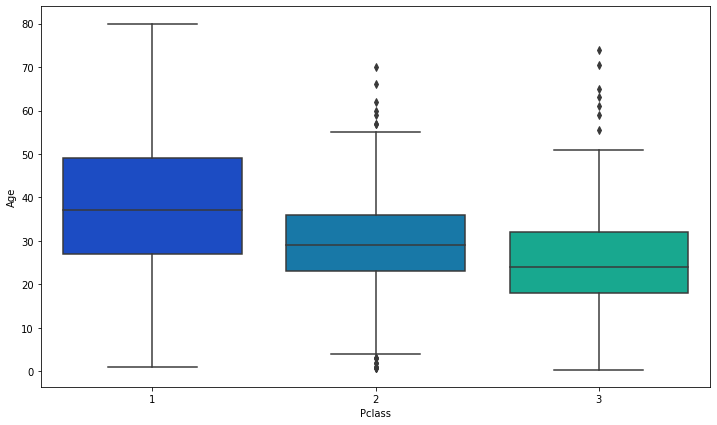

In [29]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=data,palette='winter')

We have visualized our Data using a Box plot, to get our Data split quartal wise. We have split the age as per Passenger class.
This gives more conclusive data about the ages of different people within a class, thus helping us get concise data for our missing values.

In [30]:
def filling_values(column):
    Age = column[0]
    Pclass = column[0]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Calling the function to fill the missing function.
.apply function calls the function with each element in the series and returns the result of the function sequentially to every element in the series.

In [31]:
data['Age'] = data[['Age','Pclass']].apply(filling_values,axis=1)

Visualizing the heatmap again. We will observe that our changes is being implimented to the data set.

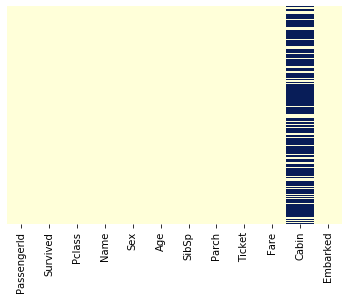

In [32]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

Since there is nothing much to process from Cabin Column, so will drop the Cabin Column from our Data set.

In [33]:
data.drop('Cabin',axis=1,inplace=True)

#### We are now done with our EDA process, and we are good to proceed for modelling of our Data.